In [42]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def sgd(x,y,epsilon = 0.001,maxsteps=200,w=0,b=0):        
    history = []
    for step in range(maxsteps):
        #print("w", w, "b", b)
        diff = w*x+b-y
        mse = np.mean(np.dot(diff,diff))
        history.append(mse)
        gradw = 2*np.mean(np.dot(x,diff))
        gradb = 2*np.mean(diff)        
        if mse < 1e-10:
            break
        if abs(gradw) < 1e-10 and abs(gradb) < 1e-10:
            break
        #print(step, w, b, mse, gradw, gradb)
        #print("mse", mse, "gradw", gradw, "gradb", gradb)
        w -= epsilon*gradw
        b -= epsilon*gradb            
    print(w, b, step+1)        
    return history    

85.0000016696 49.9999886308 6592


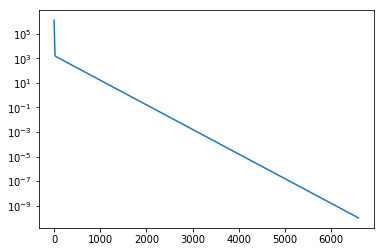

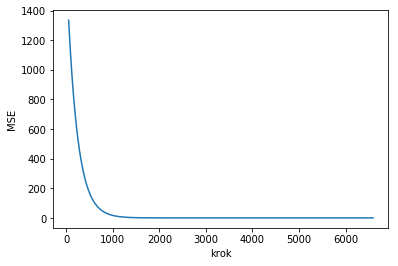

In [16]:
x = np.array([2,4,7,9])
y = 85*x+50
mse = sgd(x,y,epsilon=0.006,maxsteps=32000)
plt.semilogy(mse)
plt.show()
plt.plot(range(50,len(mse)), mse[50:])
plt.xlabel('krok')
plt.ylabel('MSE')
#plt.show()
plt.savefig('grad-prosiaki.pdf',dpi=300)

In [12]:
def stochastic_sgd(x,y,epsilon = 0.001,maxsteps=200,w=0,b=0):        
    history = []
    n = x.shape[0]    
    for step in range(maxsteps):
        #print("w", w, "b", b)
        i = np.random.choice(n)
        diff = np.array([w*x[i]+b-y[i]])
        mse = np.mean(np.dot(diff,diff))
        history.append(mse)
        gradw = 2*np.mean(np.dot(x[i],diff))
        gradb = 2*np.mean(diff)        
        if np.mean(history[-10:]) < 1e-10:
            break
        #if abs(gradw) < 1e-10 and abs(gradb) < 1e-10:
        #    break
        #print(step, w, b, mse, gradw, gradb)
        #print("mse", mse, "gradw", gradw, "gradb", gradb)
        w -= epsilon*gradw
        b -= epsilon*gradb            
    print(w, b, step+1)        
    return history    

85.0000036004 49.999976661 6064


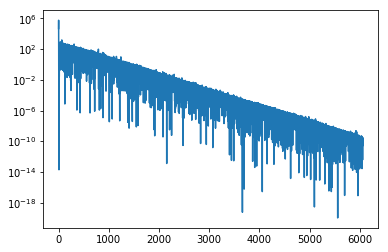

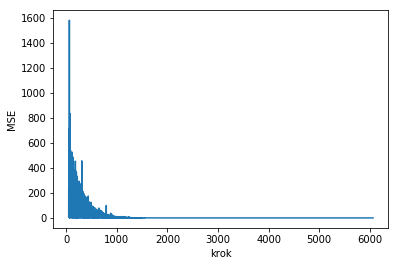

In [14]:
x = np.array([2,4,7,9])
y = 85*x+50
mse = stochastic_sgd(x,y,epsilon=0.006,maxsteps=32000)
plt.semilogy(mse)
plt.show()
plt.plot(range(50,len(mse)), mse[50:])
plt.xlabel('krok')
plt.ylabel('MSE')
plt.savefig('sgd-prosiaki.pdf', dpi=300)

In [53]:
n=100
X=np.arange(n)
X = np.stack((X**5, X, np.ones((n,))),axis=1)
y = X@np.array([1e-6, 1000, 0])
#print(X)
#print(y)

In [145]:
np.random.seed(0xbeef)
x=20*np.random.rand(200)+20
x=np.array(sorted(x))
y_true = .02*x**3+10*x+5
error = 100*np.random.randn(*y_true.shape)
y_measured = y_true + error
#y_measured = y_true

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler, StandardScaler

X = x.reshape(-1, 1)
X = np.hstack([X**i for i in range(1, 5)])
X = StandardScaler().fit_transform(X)

indices = np.random.permutation(200)
train = indices[:100]
test = indices[100:]

plt.scatter(x, y_true)
plt.scatter(x[train], y_measured[train])
plt.scatter(x[test], y_measured[test])
plt.savefig('reg-2deg-with-noise.pdf', dpi=300)
plt.clf()

In [97]:

for alpha in (0, 0.001, 1, 100, 1000000):
    model = Ridge(alpha=alpha,fit_intercept=True)
    model.fit(X[train], y_measured[train])
    y_pred = model.predict(X)
    mse_train = np.mean((y_pred[train]-y_measured[train])**2)
    mse_test = np.mean((y_pred[test]-y_measured[test])**2)
    penalty = np.sum(model.coef_**2)/2
    print('$', end='')
    print(alpha, int(mse_train), int(penalty), int(mse_train+alpha*penalty), int(mse_test), sep="$ & $", end=r'$\\'+'\n')
    #print("\t", mse_test)
    #print("\t", model.intercept_, *model.coef_)
    poly = '{:.2f}'.format(model.intercept_)+ ''.join(['{0:+.2f}x^{1}'.format(c, i+1) for i,c in enumerate(model.coef_)])
    plt.title('$'+poly+'$'+'\nMSE=$'+str(mse_train)+'$')
    plt.scatter(x[train], y_measured[train])
    plt.scatter(x[train], y_pred[train])
    fn = str(alpha).replace('.', '_')
    plt.savefig('reg-2deg-with-noise-ridge{}.pdf'.format(fn), dpi=300)
    #plt.show()
    plt.clf()
#plt.show()

$0$ & $10292$ & $4651895996$ & $10292$ & $9627$\\
$0.001$ & $10937$ & $245404$ & $11183$ & $8726$\\
$1$ & $10949$ & $17605$ & $28554$ & $8678$\\
$100$ & $16584$ & $11130$ & $1129591$ & $12312$\\
$1000000$ & $149280$ & $0$ & $152023$ & $138743$\\


In [103]:
for alpha in (0, 0.001, 10, 100, 1000000):
    model = Lasso(alpha=alpha,fit_intercept=True)
    model.fit(X[train], y_measured[train])
    y_pred = model.predict(X)
    mse_train = np.mean((y_pred[train]-y_measured[train])**2)
    mse_test = np.mean((y_pred[test]-y_measured[test])**2)
    penalty = np.sum(model.coef_**2)/2
    n_coef = len([1 for c in model.coef_ if abs(c)>0.01])
    print('$', end='')
    print(alpha, n_coef, int(mse_train), int(penalty), int(mse_train+alpha*penalty), int(mse_test), sep="$ & $", end=r'$\\'+'\n')
    #print("\t", mse_test)
    #print("\t", model.intercept_, *model.coef_)
    poly = '{:.2f}'.format(model.intercept_)+ ''.join(['{0:+.2f}x^{1}'.format(c, i+1) for i,c in enumerate(model.coef_)  if abs(c)>=0.01])
    plt.title('$'+poly+'$'+'\nMSE=$'+str(mse_train)+'$')
    plt.scatter(x[train], y_measured[train])
    plt.scatter(x[train], y_pred[train])
    fn = str(alpha).replace('.', '_')
    plt.savefig('reg-3deg-with-noise-lasso{}.pdf'.format(fn), dpi=300)
    #plt.show()
    plt.clf()

/usr/lib/python3/dist-packages/ipykernel/__main__.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  app.launch_new_instance()
/usr/lib/python3/dist-packages/sklearn/linear_model/coordinate_descent.py:465: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
/usr/lib/python3/dist-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


$0$ & $4$ & $10946$ & $18211$ & $10946$ & $8722$\\
$0.001$ & $4$ & $10946$ & $18211$ & $10965$ & $8721$\\
$10$ & $3$ & $11048$ & $25319$ & $264241$ & $8562$\\
$100$ & $2$ & $20983$ & $33287$ & $3349752$ & $16524$\\
$1000000$ & $0$ & $149390$ & $0$ & $149390$ & $138850$\\


In [155]:
def vec_gd_es(X_train,y_train,X_test,y_test,epsilon = 0.001,maxsteps=200,w=None):
    hist_train = []
    hist_test = []
    m = X_train.shape[0]
    w = np.zeros(X_train.shape[1])    
    for step in range(maxsteps):        
        diff_train = X_train@w.T-y_train        
        mse_train = diff_train@diff_train/m
        hist_train.append(mse_train)
        diff_test = X_test@w.T-y_test
        mse_test = diff_test@diff_test/m
        hist_test.append(mse_test)
        grad = 2/m*X_train.T@(X_train@w.T-y_train)
        #print(grad)
        if step % 10000 == 0:
            print(w, grad)
        if mse_train < 1e-10:
            break
        if np.max(np.abs(grad)) < 1e-10:
            break
        w -= epsilon*grad        
    print(w, step+1)        
    return hist_train, hist_test

In [186]:
hist_train, hist_test = vec_gd_es(X[train],y_measured[train],X[test],y_measured[test],epsilon=1e-5, maxsteps=75000)

[ 0.  0.  0.  0.] [-890.6494737  -899.76088768 -901.3251667  -896.21927463]
[ 61.43919529  61.99908685  62.03790505  61.61507582] [-402.41767905 -405.32318411 -404.81064194 -401.25733647]
[ 89.25492085  89.94778419  89.88284875  89.14454006] [-182.81000247 -182.93233218 -181.4936503  -178.64622838]
[ 101.94637018  102.58099403  102.34897355  101.34422297] [-84.02348931 -82.90205987 -81.05473745 -78.53232222]
[ 107.8340721   108.32525641  107.89845491  106.65006761] [-39.57969474 -37.9068489  -35.88359429 -33.51482736]
[ 110.66042101  110.97064196  110.33738638  108.85636396] [-19.57810913 -17.66519542 -15.57062475 -13.27838473]
[ 112.10866935  112.22184168  111.37766065  109.66969093] [-10.57015535  -8.55715995  -6.43827675  -4.18782823]
[ 112.93591379  112.8455897   111.78924596  109.85762195] [-6.50696542 -4.45679995 -2.33469516 -0.11036734]
[ 113.23199214  113.03896853  111.87657068  109.83398821] 75000


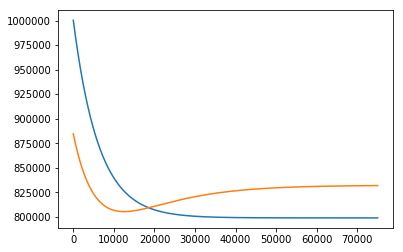

In [187]:
plt.clf()
plt.plot(hist_train)
plt.plot(hist_test)
#plt.show()
plt.savefig('earlystopping.pdf', dpi=300)

In [194]:
def vec_sgd_es(X_train,y_train,X_test,y_test,epsilon = 0.001,maxsteps=200,w=None):
    hist_train = []
    hist_test = []
    m = X_train.shape[0]
    w = np.zeros(X_train.shape[1])    
    for step in range(maxsteps):  
        i = np.random.randint(0, m)
        diff_train = X_train[i,:]@w-y_train[i]
        mse_train = diff_train**2
        hist_train.append(mse_train)
        j = np.random.randint(0, m)
        diff_test = X_test@w.T-y_test
        mse_test = diff_test@diff_test/m
        hist_test.append(mse_test)        
        grad = 2*X_train[i,:]*diff_train
        #print(grad)
        if step % 10000 == 0:
            print(w, grad)
        if mse_train < 1e-10:
            break
        if np.max(np.abs(grad)) < 1e-10:
            break
        w -= epsilon*grad        
    print(w, step+1)        
    return hist_train, hist_test

In [195]:
hist_train, hist_test = vec_sgd_es(X[train],y_measured[train],X[test],y_measured[test],epsilon=1e-5, maxsteps=75000)

[ 0.  0.  0.  0.] [-572.2079363  -390.58171591 -204.39455907  -23.13626869]
[ 61.49098052  61.85510418  61.70419833  61.10274536] [-1275.90789921 -1157.99189241 -1016.95952124  -860.80376868]
[ 89.64265348  90.39157446  90.36811301  89.66086038] [-910.97366135 -763.76267089 -602.04561552 -434.59633854]
[ 102.31580262  103.0836011   102.93132606  101.96155399] [ 627.04350308  771.46256313  889.99801981  980.17725376]
[ 108.03710275  108.79279765  108.57526631  107.48988009] [ 2968.386767    2748.48987781  2528.1559284   2316.92559962]
[ 112.22218971  112.74987793  112.27292369  110.89722613] [-2800.81963116 -3109.54065966 -3418.44824072 -3720.8431923 ]
[ 111.4120085   111.8367328   111.22417736  109.67331794] [ 3057.54941243  2913.85836674  2746.84795486  2569.16319952]
[ 113.01204561  113.52537671  112.96167261  111.41089194] [-1467.56745816 -1426.28598375 -1358.61751772 -1268.86394258]
[ 114.65632218  115.00178775  114.25694777  112.51379871] 75000


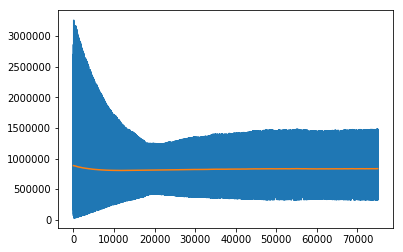

In [196]:
plt.clf()
plt.plot(hist_train)
plt.plot(hist_test)
#plt.show()
plt.savefig('earlystopping-sgd.pdf', dpi=300)